Detected anomalies: ['ACC4', 'MerchantH', 'ACC10', 'ACC8', 'MerchantE', 'ACC6', 'MerchantI', 'ACC15', 'MerchantC', 'ACC9', 'ACC7', 'MerchantD', 'ACC12', 'ACC2', 'MerchantB', 'ACC14', 'ACC1', 'MerchantJ', 'MerchantA', 'MerchantG', 'ACC11', 'MerchantF', 'ACC3', 'ACC5', 'ACC13']
Number of detected anomalies: 25


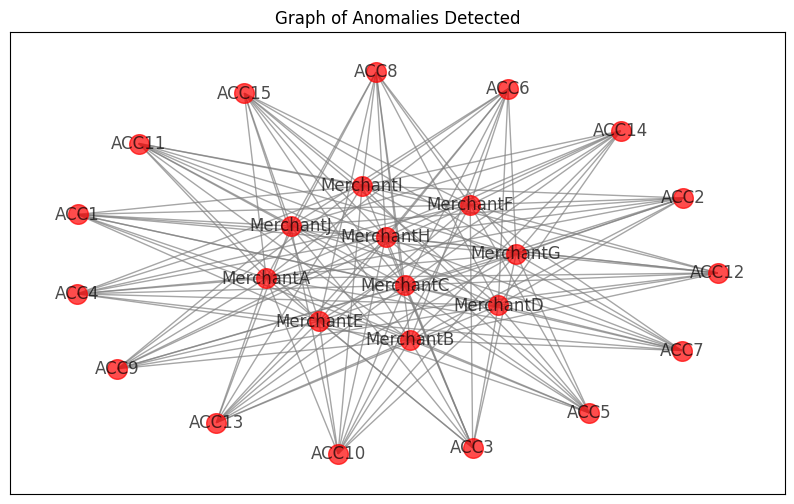

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def csv_to_graph(csv_file, sender_col, receiver_col):
    df = pd.read_csv(csv_file)
    graph = nx.from_pandas_edgelist(df, source=sender_col, target=receiver_col)
    return graph

def detect_anomalies(graph, threshold):
    degree_centralities = nx.degree_centrality(graph)
    anomalies = [node for node, centrality in degree_centralities.items() if centrality > threshold]
    return anomalies

if __name__ == "__main__":
    csv_file = '/content/financial_anomaly_data.csv'
    sender_col = 'AccountID'
    receiver_col = 'Merchant'
    graph = csv_to_graph(csv_file, sender_col, receiver_col)

    centrality_threshold = 0.1
    detected_anomalies = detect_anomalies(graph, centrality_threshold)

    print("Detected anomalies:", detected_anomalies)
    print("Number of detected anomalies:", len(detected_anomalies))

    anomaly_subgraph = graph.subgraph(detected_anomalies)

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(anomaly_subgraph)
    nx.draw_networkx(anomaly_subgraph, pos, with_labels=True, node_color='r', node_size=200, edge_color='gray', alpha=0.7)
    plt.title("Graph of Anomalies Detected")
    plt.show()


Detected anomalies: ['ACC4', 'MerchantH', 'ACC10', 'ACC8', 'MerchantE', 'ACC6', 'MerchantI', 'ACC15', 'MerchantC', 'ACC9', 'ACC7', 'MerchantD', 'ACC12', 'ACC2', 'MerchantB', 'ACC14', 'ACC1', 'MerchantJ', 'MerchantA', 'MerchantG', 'ACC11', 'MerchantF', 'ACC3', 'ACC5', 'ACC13']
Number of detected anomalies: 25
Anomaly Density: 0.9615384615384616
Original Average Degree: 11.615384615384615
Average Degree without Anomalies: 2.0


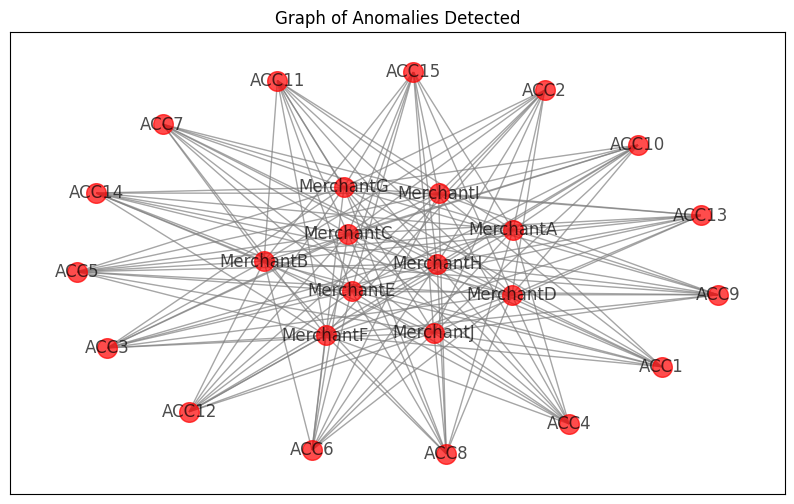

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def csv_to_graph(csv_file, sender_col, receiver_col):
    df = pd.read_csv(csv_file)
    graph = nx.from_pandas_edgelist(df, source=sender_col, target=receiver_col)
    return graph

def detect_anomalies(graph, threshold):
    degree_centralities = nx.degree_centrality(graph)
    anomalies = [node for node, centrality in degree_centralities.items() if centrality > threshold]
    return anomalies

def compute_performance(graph, detected_anomalies):
    total_nodes = len(graph.nodes)
    anomaly_density = len(detected_anomalies) / total_nodes

    non_anomaly_graph = graph.copy()
    non_anomaly_graph.remove_nodes_from(detected_anomalies)

    original_avg_degree = sum(dict(graph.degree()).values()) / total_nodes
    non_anomaly_avg_degree = sum(dict(non_anomaly_graph.degree()).values()) / (total_nodes - len(detected_anomalies))

    return anomaly_density, original_avg_degree, non_anomaly_avg_degree

if __name__ == "__main__":
    csv_file = '/content/financial_anomaly_data.csv'
    sender_col = 'AccountID'
    receiver_col = 'Merchant'
    graph = csv_to_graph(csv_file, sender_col, receiver_col)

    centrality_threshold = 0.1
    detected_anomalies = detect_anomalies(graph, centrality_threshold)

    print("Detected anomalies:", detected_anomalies)
    print("Number of detected anomalies:", len(detected_anomalies))

    anomaly_density, original_avg_degree, non_anomaly_avg_degree = compute_performance(graph, detected_anomalies)
    print("Anomaly Density:", anomaly_density)
    print("Original Average Degree:", original_avg_degree)
    print("Average Degree without Anomalies:", non_anomaly_avg_degree)

    anomaly_subgraph = graph.subgraph(detected_anomalies)

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(anomaly_subgraph)
    nx.draw_networkx(anomaly_subgraph, pos, with_labels=True, node_color='r', node_size=200, edge_color='gray', alpha=0.7)
    plt.title("Graph of Anomalies Detected")
    plt.show()
